### 예제
1. csv폴더 안에 drinks.csv 파일 로드 
2. 결측치를 확인 
3. continent 데이터에서 존재 -> 결측치를 'OT' 대체
4. continent별 spirit_servings 컬럼의 평균, 최소, 최대, 합계 출력
5. total_litres_of_pure_alcohol 컬럼의 평균보다 높은 continent가 어디인지 출력
6. 국가별 술 소비량 대비 알콜 비율 컬럼을 생성

In [1]:
import pandas as pd

In [2]:
# 파일 로드 
drinks = pd.read_csv("../../csv/drinks.csv")
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


In [3]:
# 결측치를 확인 
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [4]:
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [12]:
drinks.isna().any(0)

C:\Users\moons\AppData\Local\Temp\ipykernel_4780\316464934.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  drinks.isna().any(0)


country                         False
beer_servings                   False
spirit_servings                 False
wine_servings                   False
total_litres_of_pure_alcohol    False
continent                        True
dtype: bool

In [14]:
## 결측치에 'OT'값으로 대체
#case1
drinks['continent'] = drinks['continent'].fillna('OT')
# case2 : continent를 제외한 다른 컬럼에서는 결측치가 존재 하지 않기 때문에
# 데이터프레임에 fillna()를 사용해도 무관
drinks = drinks.fillna('OT')
# case3 : continent가 결측치인 데이터중 continent 컬럼의 데이터를 OT로 대체
drinks.loc[(drinks['continent'].isna()), 'continent'] = 'OT'

In [ ]:
# continent별 spirit_servings데이터의 최소, 평균, 최대, 합계
# drinks.groupby('continent').min()['spirit_servings']
drinks[['continent', 'spirit_servings']].groupby('continent').min()

In [20]:
# 그룹화 연산을 한번에 보여주기 위한 함수
group_data = \
drinks[['continent', 'spirit_servings']].groupby('continent')\
    .agg(['min', 'mean', 'max', 'sum'])

In [22]:
# group_data에서 continent가 AS이고 spirit_servings의 max 값을 출력
group_data['spirit_servings'].loc['AS', 'max']

326

In [24]:
# total_litres_of_pure_alcohol의 평균값보다 
# continent별 total_litres_of_pure_alcohol이 높은 지역을 출력
mean_alcohol = drinks['total_litres_of_pure_alcohol'].mean()

In [26]:
group_data2 = \
drinks[['continent', 'total_litres_of_pure_alcohol']]\
    .groupby('continent').mean()

In [29]:
group_data2.loc[\
    group_data2['total_litres_of_pure_alcohol'] > mean_alcohol]

,total_litres_of_pure_alcohol
continent,
EU,8.617778
OT,5.995652
SA,6.308333


In [31]:
# 파생변수 
# total_servings -> beer_servings + spirit_servings + wine_servings
drinks['total_servings'] = drinks['beer_servings'] + \
    drinks['spirit_servings'] + drinks['wine_servings']


In [34]:
# 파생변수
# alcohol_rate -> (total_lites_of_pure_alcohol / total_servings) * 100
drinks['alcohol_rate'] = \
((drinks['total_litres_of_pure_alcohol'] \
   / drinks['total_servings']) * 100).fillna(0)


In [44]:

# 가장 독한 술을 먹는 나라 상위 10위까지를 출력
# alcohol_rate를 기준으로 내림차순 정렬 -> 상위 10개 데이터를 출력(head(10))
data = drinks.sort_values('alcohol_rate', ascending=False)
data.head(10)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
63,Gambia,8,0,1,2.4,AF,9,26.666667
153,Sierra Leone,25,3,2,6.7,AF,30,22.333333
124,Nigeria,42,5,2,9.1,AF,49,18.571429
179,Uganda,45,9,0,8.3,AF,54,15.370370
142,Rwanda,43,2,0,6.8,AF,45,15.111111
183,Tanzania,36,6,1,5.7,AF,43,13.255814
26,Burkina Faso,25,7,7,4.3,AF,39,11.025641
33,Central African Republic,17,2,1,1.8,AF,20,9.000000
28,Cote d'Ivoire,37,1,7,4.0,AF,45,8.888889
104,Mali,5,1,1,0.6,AF,7,8.571429


In [45]:
# 우리나라는 몇위인가? 출력
data.reset_index(drop=True, inplace=True)

data.loc[data['country'] == 'South Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
14,South Korea,140,16,9,9.8,AS,165,5.939394


In [42]:
import matplotlib.pyplot as plt

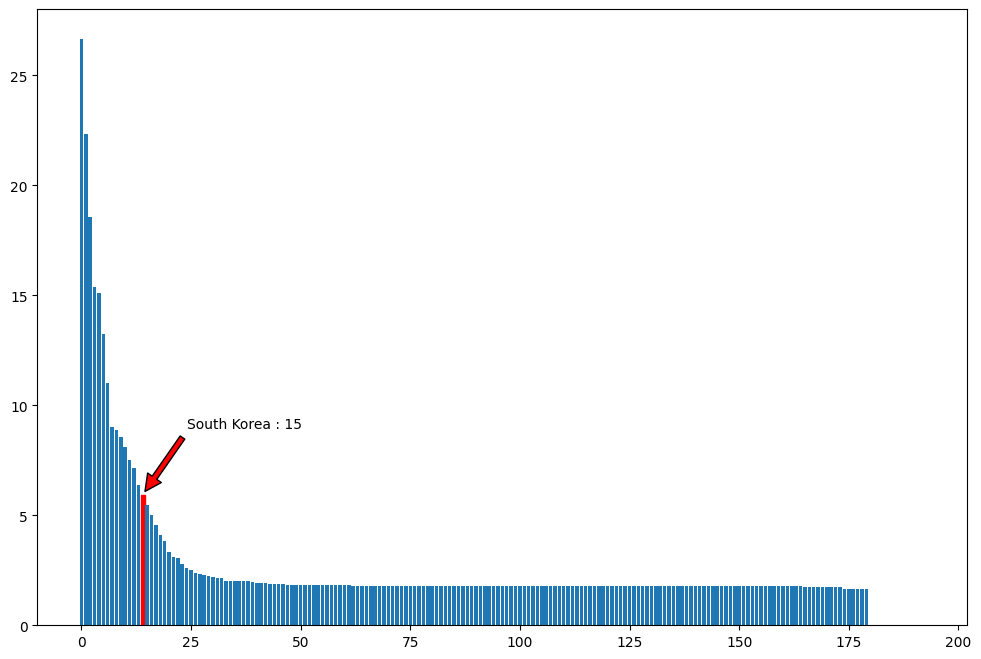

In [53]:
# 독한 술 먹는 나라 순으로 막대그래프 표시 

x = data.index
y = data['alcohol_rate']

# 그래프 사이즈를 변경
plt.figure(figsize=(12, 8))

# 한국의 랭킹이 몇위인가? 
korea_index = data.loc[data['country'] == 'South Korea'].index[0]
# 한국의 alcohol_rate의 값은?
korea_alcohol_rate = data.loc[korea_index, 'alcohol_rate']

bar_list = plt.bar(x, y)

# korea의 막대의 색을 빨간색으로 변경
bar_list[korea_index].set_color('r')

# 그래프에 주석을 표시 
plt.annotate(
    'South Korea : ' + str(korea_index + 1), 
    xytext = (korea_index + 10, korea_alcohol_rate + 3), 
    xy = (korea_index, korea_alcohol_rate), 
    arrowprops= dict(
        facecolor = 'r', 
        shrink =  0.05)
)

plt.show()